In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [9]:

data = pd.read_csv(r'C:\Users\Admin\Desktop\BTC-USD.csv')
print(data.tail())

            Date          Open          High           Low         Close  \
2221  2023-03-08  22216.441406  22268.896484  21708.050781  21718.080078   
2222  2023-03-09  21720.080078  21802.716797  20210.306641  20363.021484   
2223  2023-03-10  20367.001953  20370.595703  19628.253906  20187.244141   
2224  2023-03-11  20187.876953  20792.525391  20068.660156  20632.410156   
2225  2023-03-12  20608.310547  20721.226563  20448.806641  20590.931641   

         Adj Close       Volume  
2221  21718.080078  22536575684  
2222  20363.021484  30364664171  
2223  20187.244141  39578257695  
2224  20632.410156  30180288176  
2225  20590.931641  20716259328  


In [10]:
data_training = data[data['Date']< '2023-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-06,1028.400024,1044.640015,1028.160034,1038.150024,1038.150024,111762000
1,2017-02-07,1040.140015,1061.930054,1040.140015,1061.349976,1061.349976,146007008
2,2017-02-08,1062.319946,1078.969971,1037.489990,1063.069946,1063.069946,201855008
3,2017-02-09,1064.699951,1088.989990,953.343994,994.382996,994.382996,407220000
4,2017-02-10,995.632019,998.905029,946.690979,988.674011,988.674011,190452000
...,...,...,...,...,...,...,...
2150,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2151,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2152,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2153,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910


In [11]:
data_test = data[data['Date']< '2023-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-06,1028.400024,1044.640015,1028.160034,1038.150024,1038.150024,111762000
1,2017-02-07,1040.140015,1061.930054,1040.140015,1061.349976,1061.349976,146007008
2,2017-02-08,1062.319946,1078.969971,1037.489990,1063.069946,1063.069946,201855008
3,2017-02-09,1064.699951,1088.989990,953.343994,994.382996,994.382996,407220000
4,2017-02-10,995.632019,998.905029,946.690979,988.674011,988.674011,190452000
...,...,...,...,...,...,...,...
2150,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2151,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2152,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2153,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910


In [12]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,1028.400024,1044.640015,1028.160034,1038.150024,111762000
1,1040.140015,1061.930054,1040.140015,1061.349976,146007008
2,1062.319946,1078.969971,1037.489990,1063.069946,201855008
3,1064.699951,1088.989990,953.343994,994.382996,407220000
4,995.632019,998.905029,946.690979,988.674011,190452000


In [13]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.37900677e-03, 1.01570719e-03, 1.90058274e-03, 1.51029640e-03,
        1.26052859e-04],
       [1.55524799e-03, 1.27067037e-03, 2.08354369e-03, 1.85849080e-03,
        2.23644674e-04],
       [1.88821403e-03, 1.52194520e-03, 2.04307192e-03, 1.88430481e-03,
        3.82800942e-04],
       ...,
       [2.34424763e-01, 2.31162095e-01, 2.38322601e-01, 2.35704410e-01,
        4.10506999e-02],
       [2.35760952e-01, 2.31039286e-01, 2.36792187e-01, 2.35107738e-01,
        4.52026626e-02],
       [2.35195654e-01, 2.30826330e-01, 2.38457546e-01, 2.34280927e-01,
        3.18371142e-02]])

In [14]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
 X_train.append(training_data[i-60:i])
 Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(2095, 60, 5)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [16]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))


In [18]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))


In [19]:
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))


In [20]:
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_3 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 80)           

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)


Epoch 1/20
38/38 [==============================] - 9s 136ms/step - loss: 0.0497 - val_loss: 0.0021
Epoch 2/20
38/38 [==============================] - 5s 129ms/step - loss: 0.0092 - val_loss: 0.0012
Epoch 3/20
38/38 [==============================] - 5s 124ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 4/20
38/38 [==============================] - 5s 124ms/step - loss: 0.0068 - val_loss: 0.0024
Epoch 5/20
38/38 [==============================] - 5s 124ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 6/20
38/38 [==============================] - 5s 126ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 7/20
38/38 [==============================] - 5s 127ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 8/20
38/38 [==============================] - 5s 124ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 9/20
38/38 [==============================] - 5s 127ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 10/20
38/38 [==============================] - 5s 127ms/step - loss: 0.0049 - val_loss: 0.0015

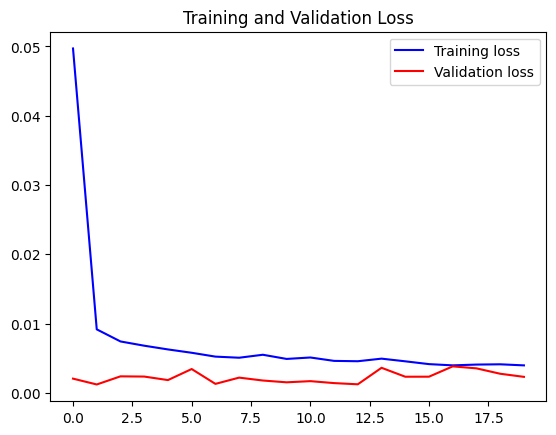

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [23]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16428\4162481076.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,20482.958984,20742.810547,20087.134766,20159.503906,55552169483
1,20162.689453,20382.095703,20086.240234,20209.988281,43228750179
2,20208.769531,21209.560547,20188.019531,21147.230469,64072727950
3,21144.832031,21446.886719,21097.634766,21282.691406,37846047609
4,21285.056641,21345.376953,20920.191406,20926.486328,35082693210


In [24]:
inputs = scaler.transform(df) 
inputs

array([[0.29343164, 0.2914898 , 0.29297351, 0.28849142, 0.15812076],
       [0.28862374, 0.28617061, 0.29295985, 0.28924911, 0.12300134],
       [0.2893155 , 0.29837261, 0.29451424, 0.30331563, 0.18240274],
       ...,
       [0.23442476, 0.23116209, 0.2383226 , 0.23570441, 0.0410507 ],
       [0.23576095, 0.23103929, 0.23679219, 0.23510774, 0.04520266],
       [0.23519565, 0.23082633, 0.23845755, 0.23428093, 0.03183711]])

In [25]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred, Y_test
scaler.scale_

68/68 [==============================] - 2s 20ms/step


array([1.50120409e-05, 1.47462472e-05, 1.52722237e-05, 1.50084104e-05,
       2.84981142e-12])

In [26]:
X_test


array([[[2.93431642e-01, 2.91489799e-01, 2.92973508e-01, 2.88491423e-01,
         1.58120759e-01],
        [2.88623743e-01, 2.86170608e-01, 2.92959847e-01, 2.89249113e-01,
         1.23001338e-01],
        [2.89315499e-01, 2.98372609e-01, 2.94514243e-01, 3.03315628e-01,
         1.82402744e-01],
        ...,
        [2.34424763e-01, 2.31162095e-01, 2.38322601e-01, 2.35704410e-01,
         4.10506999e-02],
        [2.35760952e-01, 2.31039286e-01, 2.36792187e-01, 2.35107738e-01,
         4.52026626e-02],
        [2.35195654e-01, 2.30826330e-01, 2.38457546e-01, 2.34280927e-01,
         3.18371142e-02]],

       [[2.88623743e-01, 2.86170608e-01, 2.92959847e-01, 2.89249113e-01,
         1.23001338e-01],
        [2.89315499e-01, 2.98372609e-01, 2.94514243e-01, 3.03315628e-01,
         1.82402744e-01],
        [3.03367707e-01, 3.01872280e-01, 3.08406090e-01, 3.05348682e-01,
         1.07661651e-01],
        ...,
        [2.35760952e-01, 2.31039286e-01, 2.36792187e-01, 2.35107738e-01,
        

In [27]:
Y_test

array([0.00137901, 0.00155525, 0.00188821, ..., 0.23442476, 0.23576095,
       0.23519565])

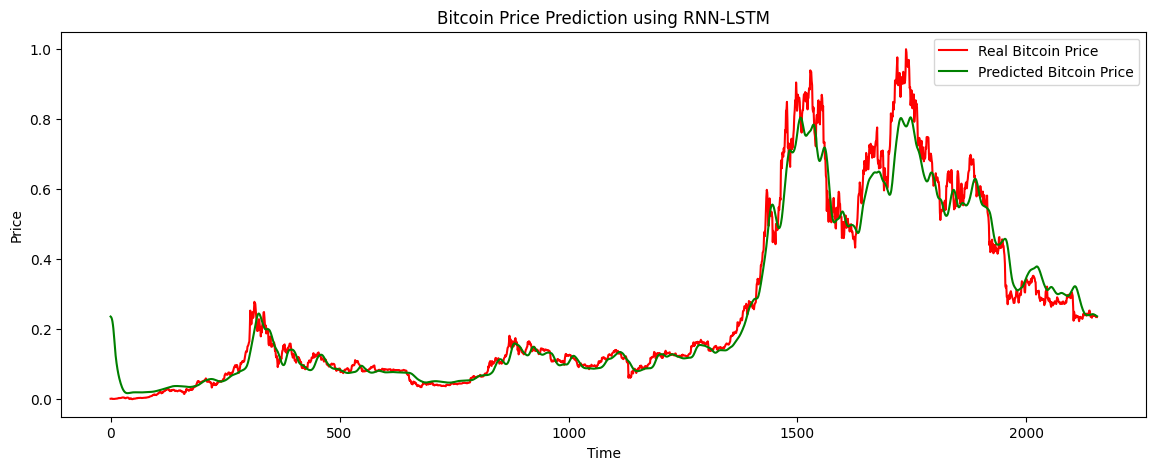

In [28]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()